# Analisi Dataset

Dopo aver campionato il dataset originale, si passa ad un'analisi esplorativa dei dati a disposizione.

## Importazione delle librerie necessarie
Si installano e importano le librerie necessarie per l'analisi e la visualizzazione dei dati. 

In [1]:
#importo le librerie necessarie
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as IPD
import wave

## Importazione del dataset
Importiamo anche il dataset dove effettueremo l'analisi.

In [2]:
train_ds, validation_ds = tf.keras.utils.audio_dataset_from_directory(
    directory='../reduced_dataset/dataset/audio',
    validation_split=0.4, # stiamo mettendo da parte il 40% del dataset, che sarà suddiviso in validation set e test set
    shuffle=True,
    subset='both', # necessario se stiamo utilizzando validation_split (se no darebbe errore)
    seed=0 # necessario se stiamo utilizzando sia shuffle che validation_split (se no darebbe errore)
)

Found 12933 files belonging to 30 classes.
Using 7760 files for training.
Using 5173 files for validation.


## Analisi statistica
Procediamo visualizzando il **nome** e il **numero** delle classi a disposizione. Successivamente viene creato un grafico che mostra la distribuzione di ciascuna etichetta.

In [4]:
dataset = tf.keras.utils.audio_dataset_from_directory(directory='../reduced_dataset/dataset/audio')

print('\nNumero classi:', len(dataset.class_names))
print('Classi:', dataset.class_names)

Found 12933 files belonging to 30 classes.

Numero classi: 30
Classi: ['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


In [5]:
label_counter = dict() # creiamo dizionario per tenere traccia della quantità di file per ogni label

# contiamo il numero di file per ogni label
for audio, labels in dataset:
    for label in labels:
        label_name = dataset.class_names[label.numpy()] # label è un int, perciò devo ricavarmi il nome

        # essendo il dizionario vuoto, darebbe errore se provassi ad accedere a una key inesistente
        if label_name not in label_counter.keys():
            label_counter[label_name] = 1
        else:
            label_counter[label_name] += 1

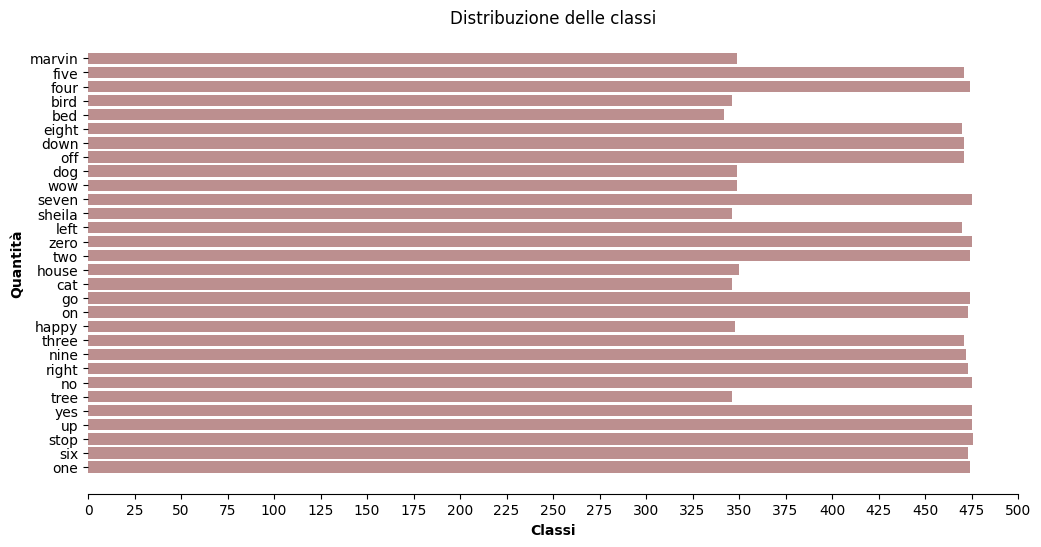

In [6]:
# mostriamo la distribuzione delle classi
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(list(label_counter.keys()), list(label_counter.values()), color='rosybrown')
# label e titolo
ax.set_xlabel('Classi', fontweight="semibold")
ax.set_ylabel('Quantità', fontweight="semibold")
ax.set_title('Distribuzione delle classi')
# forzo l'asse x
ax.set_xticks(np.arange(0, 525, 25))

# nascondo bordi plot
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

Si può notare un leggero sbilanciamento nel dataset. Alcune etichette hanno più del 35% di dati in più rispetto alle meno rappresentate. 

## Analisi esplorativa

Un passaggio fondamentale dell'analisi esplorativa di un dataset è la visualizzazione della forma (shape) dei dati a disposizione.

In [3]:
for audios, labels in train_ds:
    print("Forma (shape) audio:", audios.shape)
    print("Forma (shape) classi:", labels.shape)
    break

Forma (shape) audio: (32, 16000, 1)
Forma (shape) classi: (32,)


Lo shape dell'audio è di **(32, 16000, 1)**, indicando che ogni file è contenuto in un batch di 32 tensori di lunghezza 16000. La lunghezza del tensore coincide alla frequenza di campionamento dell'audio, la quale corrisponde a **16.000 Hz**.

A seconda della quantità di canali un audio è detto **mono** o **stereo**, e sono rappresentati rispettivamente da **uno (1)** e **due (2)** canali. L'ultimo valore della forma dell'audio analizzato corrisponde a uno (1) e indica che l'audio è una **registrazione mono**. 

Inoltre, lo shape delle classi è anch'esso 32. Questo perché la funzione `tf.keras.utils.audio_dataset_from_directory(directory)` ha il parametro `batch_size` impostato a 32 di default, non avendolo specificato la dimensione è rimasta tale.

## Riproduzione di un audio

`IPython.display` è una libreria utilizzata per mostrare diversi tipi di file: immagini, audio, video, file html, ...

Nel seguente caso verrà usata per riprodurre un audio scelto casualmente.

In [7]:
#proviamo ad ascoltare un audio e capiamo come farlo sopratutto
path_audio = '../reduced_dataset/dataset/audio/wow/0bde966a_nohash_1.wav'
audio = IPD.Audio(path_audio, autoplay=False)
display(audio)

# Probabilmente non è possibile ascoltare l'audio senza l'esecuzione della cella

Visualizziamo l'audio appena riprodotto.

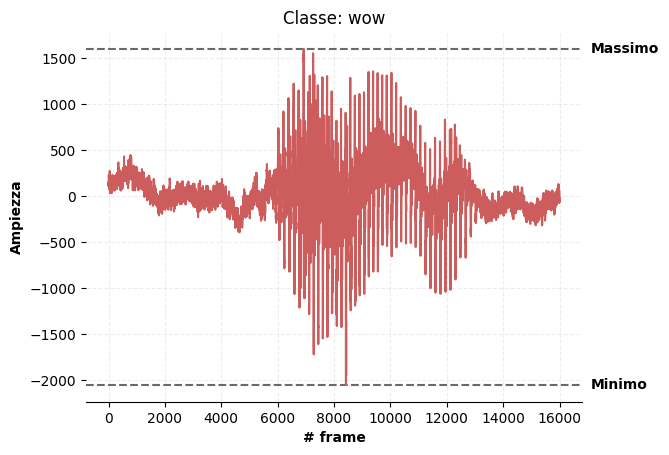

In [8]:
# leggiamo l'audio dalla path sopra indicata
audio = wave.open(path_audio, "r").readframes(-1)
audio = np.frombuffer(audio, dtype=np.int16)

fig, ax = plt.subplots()

# disegniamo le linee del massimo e del minimo, con i rispettivi flag
ax.axhline(y=max(audio), c='dimgrey', linestyle='--')
ax.axhline(y=min(audio), c='dimgrey', linestyle='--')
ax.text(len(audio) * 1.07, max(audio), 'Massimo', fontsize=10, fontweight="bold", horizontalalignment="left", verticalalignment="center")
ax.text(len(audio) * 1.07, min(audio), 'Minimo', fontsize=10, fontweight="bold", horizontalalignment="left", verticalalignment="center")

# rimuoviamo il limite di destra e di sopra
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# infine mostriamo il plot
ax.set_ylabel('Ampiezza', fontweight="bold")
ax.set_xlabel('# frame', fontweight="bold")
ax.set_title("Classe: " + path_audio.split("/")[-2])
ax.plot(audio, color="indianred")
ax.grid(True, color="gainsboro", linestyle="--", alpha=0.5)

plt.show()

Mostrando graficamente l'audio appena ascoltato si può notare la sua ampiezza e di conseguenza i rispettivi minimi e massimi.

Gli audio che stiamo trattando hanno una **profondità di 16 bit**, questo vuol dire che sono rappresentati da **$2^{16}$** valori, il quale corrisponde a **65.536 valori possibili**. Considerato che l'ampiezza può assumere sia valori negativi sia valori positivi, essa varia da **-32.768** a **32.767**

## Funzioni utilizzate

Per questo task ci servirà la funzione `take_audios()` che si occcupa di ottenere un audio per ogni classe presente. La funzione restituisce un dizionario contenente come **chiave** il nome della classe e come valore **l'audio corrispondente**.

In [9]:
def take_audios():
    audio_to_show = dict() # creo il dizionario che conterrà gli audio

    # itero i batch del training set
    for audios, labels in dataset:
        # itero all'interno del batch 
        for index, label in enumerate(labels):
            # questo controllo serve per evitare cicli inutili
            # quindi si blocca quando ha preso un audio per ogni classe
            if len(audio_to_show) == 30:
                return audio_to_show

            # mi salvo il nome della classe
            label_name = dataset.class_names[label.numpy()]

            # se la label non è presente nel dizionario allora aggiungo l'audio
            if label_name not in audio_to_show.keys():
                audio_to_show[label_name] = audios[index]

    return audio_to_show

In [10]:
# quindi ci ricaviamo gli audio da mostrare nel plot
audios = take_audios()

Con il dizionario appena creato possiamo procedere alla rappresentazione di tutte le classi su un grafico **3 x 10** utilizzando la libreria `matplotlib`. Questa panoramica generale già evidenzia significative variazioni di forma per ciascuna classe.

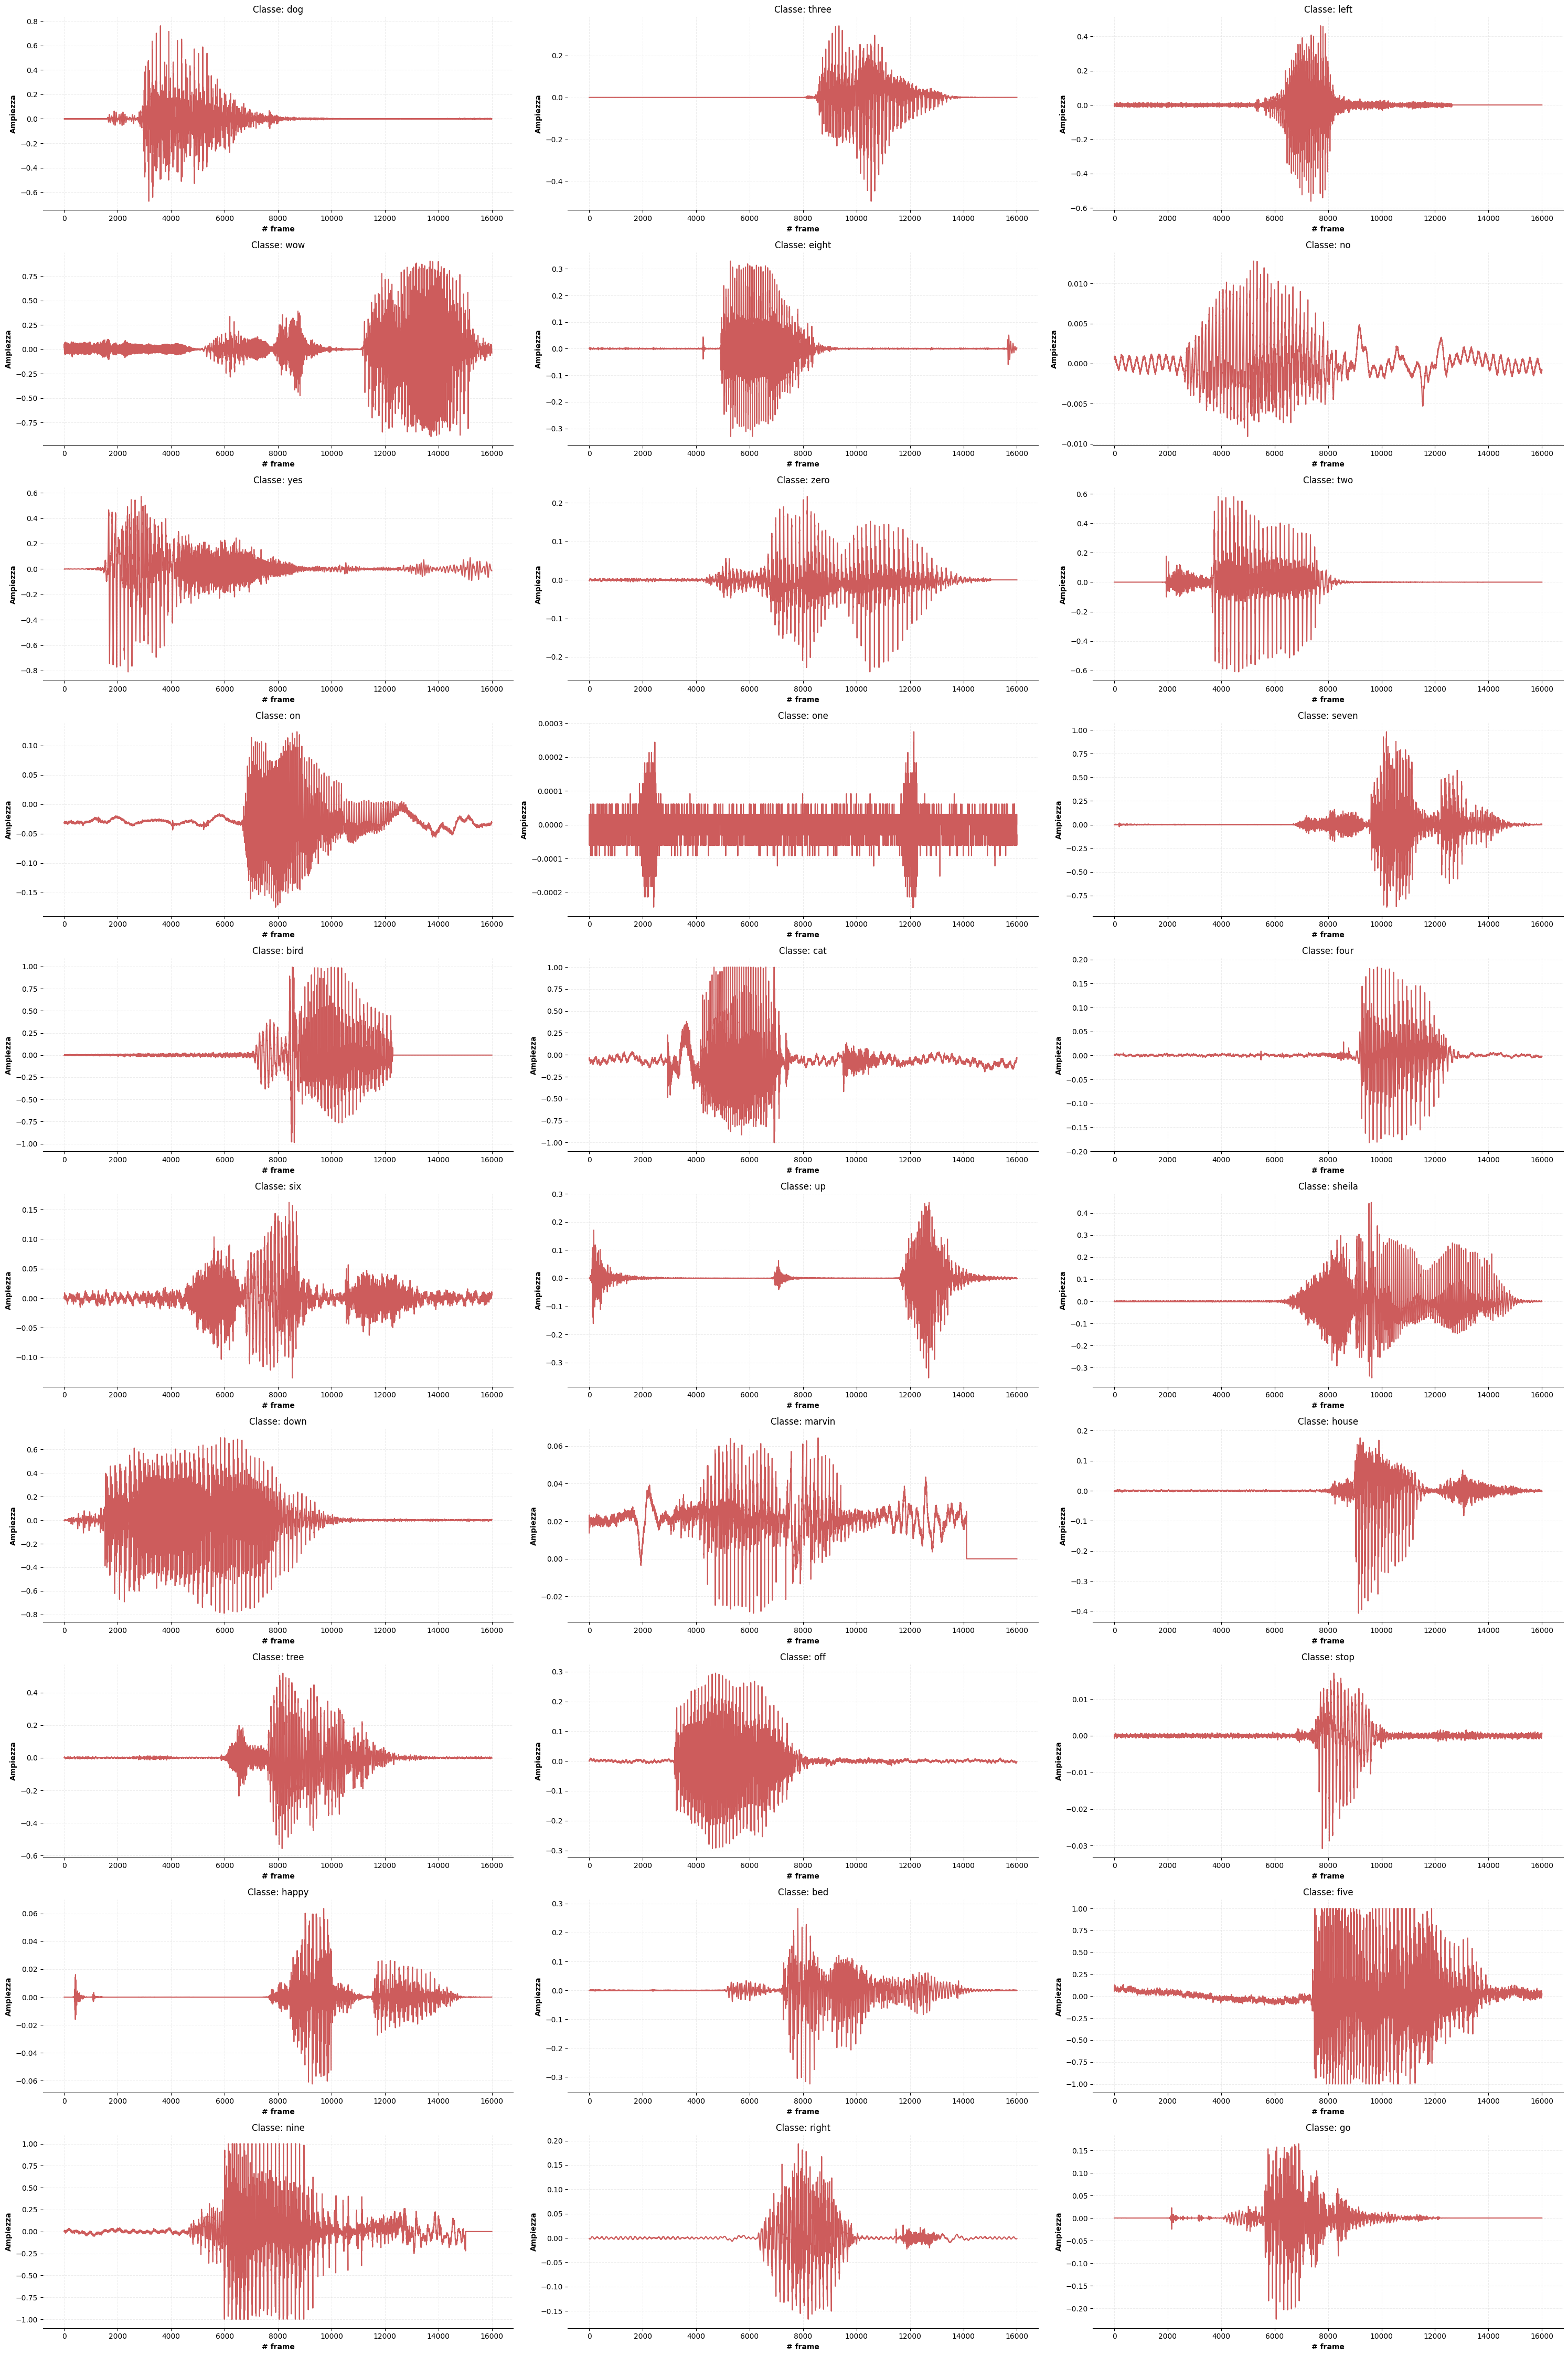

In [11]:
rows = 10
cols = 3

labels = list(audios.keys()) # mi salvo la lista delle label
fig, axes = plt.subplots(rows, cols, figsize=(30, 45))

# inserisco in ciascun subplot un audio
for index, audio in enumerate(audios.values()): 
    row = index // cols
    col = index % cols

    ax = axes[row][col]

    # rimuoviamo il limite di destra e di sopra
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.set_ylabel('Ampiezza', fontweight="bold")
    ax.set_xlabel('# frame', fontweight="bold")
    ax.set_title("Classe: " + str(labels[index]))
    ax.plot(audio, color="indianred")
    ax.grid(True, color="gainsboro", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()